In [3]:
import torchvision.datasets as datasets
from torch.utils.data import TensorDataset
import numpy as np

import torch.nn.functional as F
# import sklearn
import matplotlib.pyplot as plt
import torch
# import tensorflow_datasets as tfds
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import TensorDataset




torch.Size([60000, 28, 28])
torch.Size([1, 28, 28])


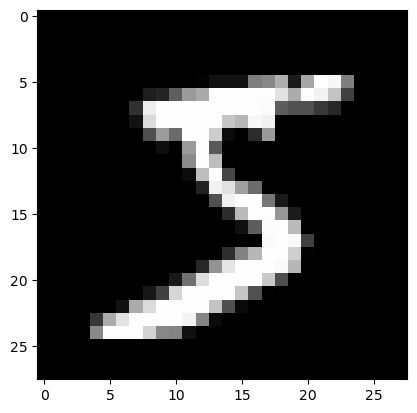

In [21]:
xpriv = datasets.MNIST(root='./data', train=True, download=True)
xpub = datasets.MNIST(root='./data', train=False)

x_train = np.array(xpriv.data)
y_train = np.array(xpriv.targets)
x_test = np.array(xpub.data)
y_test = np.array(xpub.targets)
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

print(x_train.shape)
import matplotlib.pyplot as plt
x = x_train[0].reshape(1,28,28)
print(x.shape)
plt.imshow(x.squeeze(), cmap=plt.get_cmap('gray'))

In [ ]:
x_train = x_train[:, None, :, :]
x_test = x_test[:, None, :, :]
x_train = np.tile(x_train, (1,3,1,1))
x_test = np.tile(x_test, (1,3,1,1))

x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)
x_train = F.interpolate(x_train, (32, 32))
x_test = F.interpolate(x_test, (32, 32))
x_train  = x_train / (255/2) - 1
x_test  = x_test / (255/2) - 1
x_train = torch.clip(x_train, -1., 1.)
x_test = torch.clip(x_test, -1., 1.)
xpriv = TensorDataset(x_train, y_train)
xpub = TensorDataset(x_test, y_test)
print(len(xpriv), len(xpub))
print(xpriv[0][0].shape)

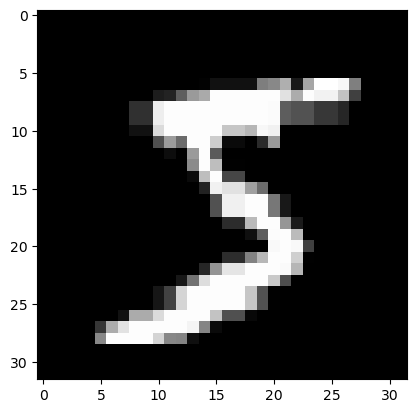

In [10]:
import matplotlib.pyplot as plt
x = xpriv[0][0]
x = (x+1)/2
plt.imshow(np.transpose(x, (1,2,0)))